In [1]:
# import sys
# !{sys.executable} -m pip install evo --upgrade --no-binary evo --user

In [5]:
from evo.tools import log
log.configure_logging()
from evo.core import metrics

In [6]:
# from evo.tools import plot
# from evo.tools.plot import PlotMode
# from evo.core.metrics import PoseRelation, Unit
# from evo.tools.settings import SETTINGS

# # temporarily override some package settings
# SETTINGS.plot_split = True
# SETTINGS.plot_usetex = False

# # magic plot configuration
# import matplotlib.pyplot as plt
# %matplotlib inline
# %matplotlib notebook
from evo.tools import plot
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

# temporarily override some package settings
from evo.tools.settings import SETTINGS
SETTINGS.plot_usetex = False

In [7]:
# # interactive widgets configuration
# import ipywidgets

# check_opts_ape = {"align": False, "correct_scale": False, "show_plot": True}
# check_boxes_ape=[ipywidgets.Checkbox(description=desc, value=val) for desc, val in check_opts_ape.items()]
# check_opts_rpe = {"align": False, "correct_scale": False, "all_pairs": False, "show_plot": True}
# check_boxes_rpe=[ipywidgets.Checkbox(description=desc, value=val) for desc, val in check_opts_rpe.items()]
# delta_input = ipywidgets.FloatText(value=1.0, description='delta', disabled=False, color='black')
# delta_unit_selector=ipywidgets.Dropdown(
#     options={u.value: u for u in Unit if u is not Unit.seconds},
#     value=Unit.frames, description='delta_unit'
# )
# plotmode_selector=ipywidgets.Dropdown(
#     options={p.value: p for p in PlotMode},
#     value=PlotMode.xy, description='plot_mode'
# )
# pose_relation_selector=ipywidgets.Dropdown(
#     options={p.value: p for p in PoseRelation},
#     value=PoseRelation.translation_part, description='pose_relation'
# )

In [8]:
from evo.tools import file_interface
from evo.core import sync

In [9]:
import copy
pose_relation = metrics.PoseRelation.rotation_angle_deg

# normal mode
delta = 1
delta_unit = metrics.Unit.frames

# all pairs mode
all_pairs = False  # activate
def traj_plot(traj_est, traj_ref):
    traj_est_aligned = copy.deepcopy(traj_est)
    traj_est_aligned.align(traj_ref, correct_scale=False, correct_only_scale=False)
    fig = plt.figure()
    traj_by_label = {
        "estimate": traj_est,
        "aligned_est": traj_est_aligned,
        "gt": traj_ref,
    }
    plot.trajectories(fig, traj_by_label, plot.PlotMode.xyz)
    plt.show()
    tum_rpe_equivalent = metrics.RPE(metrics.PoseRelation.translation_part, delta, metrics.Unit.frames, all_pairs=True)
    tum_rpe_equivalent.process_data((traj_ref, traj_est_aligned))
    print(tum_rpe_equivalent.get_statistic(metrics.StatisticsType.mean))

In [10]:
def rpe_run(traj_est, traj_ref):
    traj_est_aligned = copy.deepcopy(traj_est)
    traj_est_aligned.align(traj_ref, correct_scale=False, correct_only_scale=False)
    data = (traj_ref, traj_est_aligned)
    rpe_metric = metrics.RPE(pose_relation=pose_relation, delta=delta, delta_unit=delta_unit, all_pairs=all_pairs)
    rpe_metric.process_data(data)
    rpe_stat = rpe_metric.get_statistic(metrics.StatisticsType.rmse)
    print(rpe_stat)

abandonedfactory
434 poses, 68.205m path length 434 poses, 66.983m path length


<IPython.core.display.Javascript object>


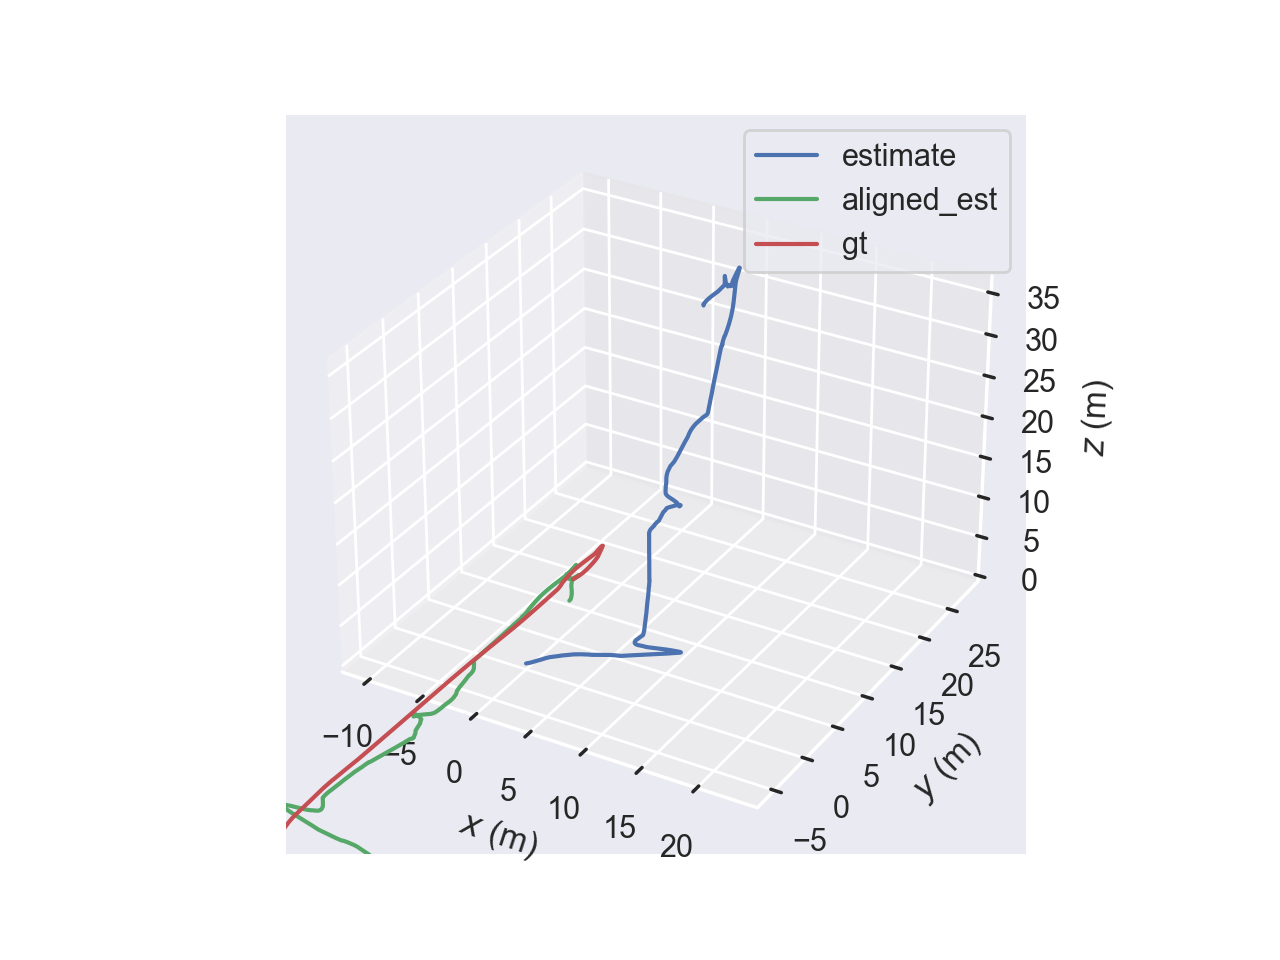

0.27712501331255357
abandonedfactory_night
837 poses, 137.741m path length 837 poses, 127.688m path length


<IPython.core.display.Javascript object>


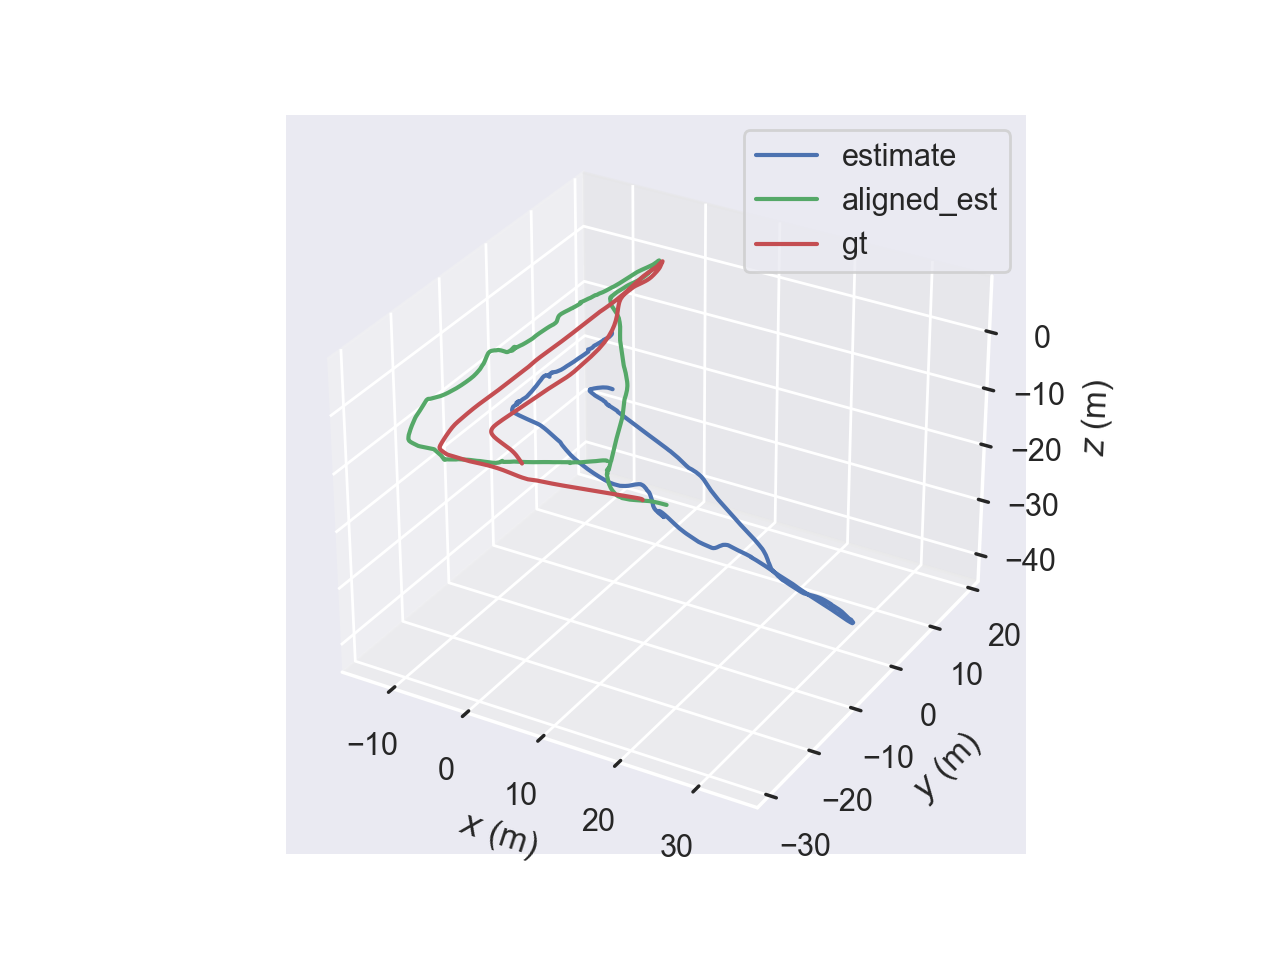

0.23308279432324538
endofworld
466 poses, 85.122m path length 466 poses, 89.111m path length


<IPython.core.display.Javascript object>


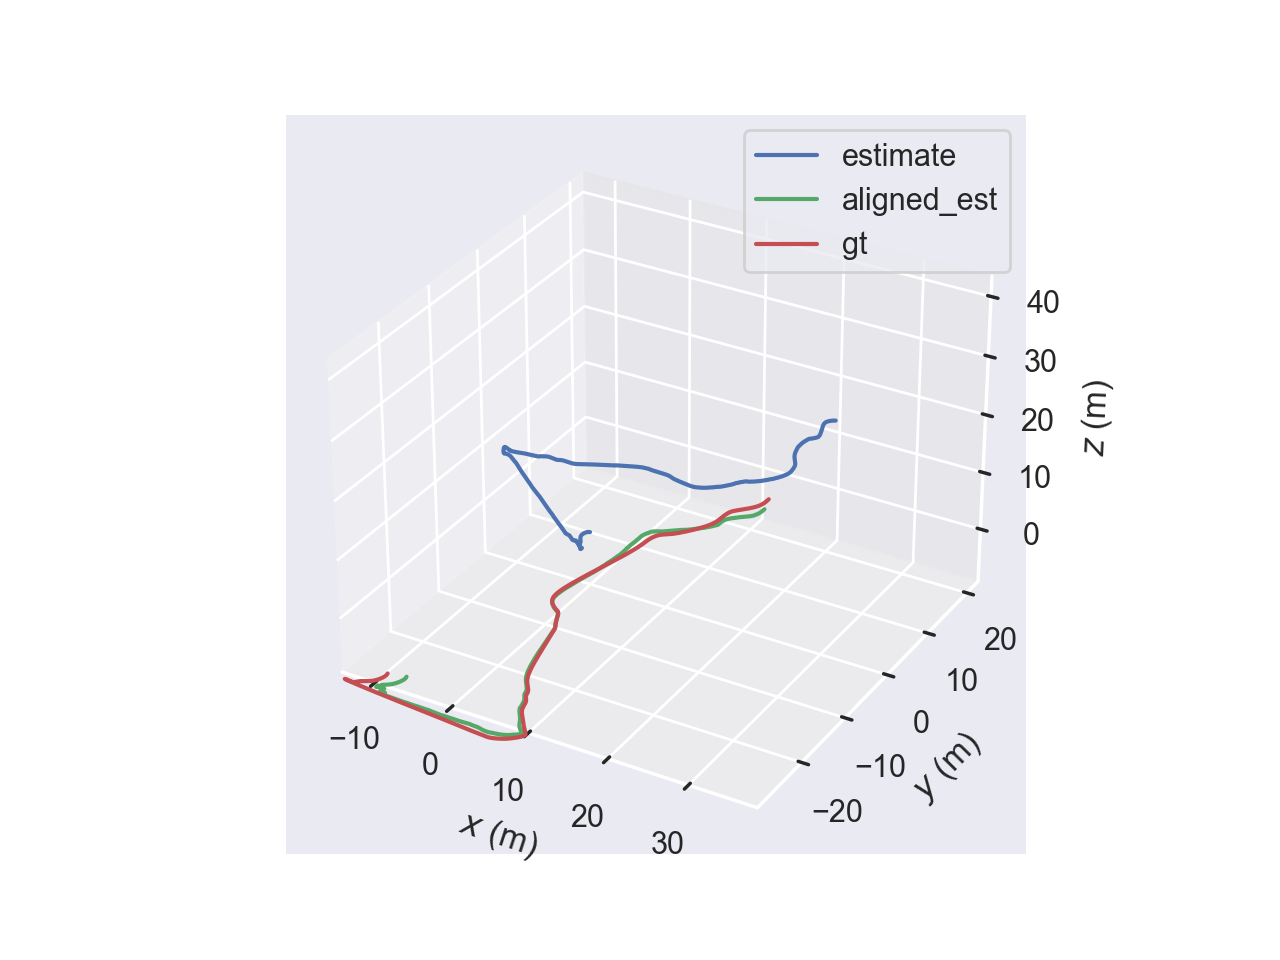

0.30994654578991526
carwelding
976 poses, 115.882m path length 976 poses, 123.650m path length


<IPython.core.display.Javascript object>


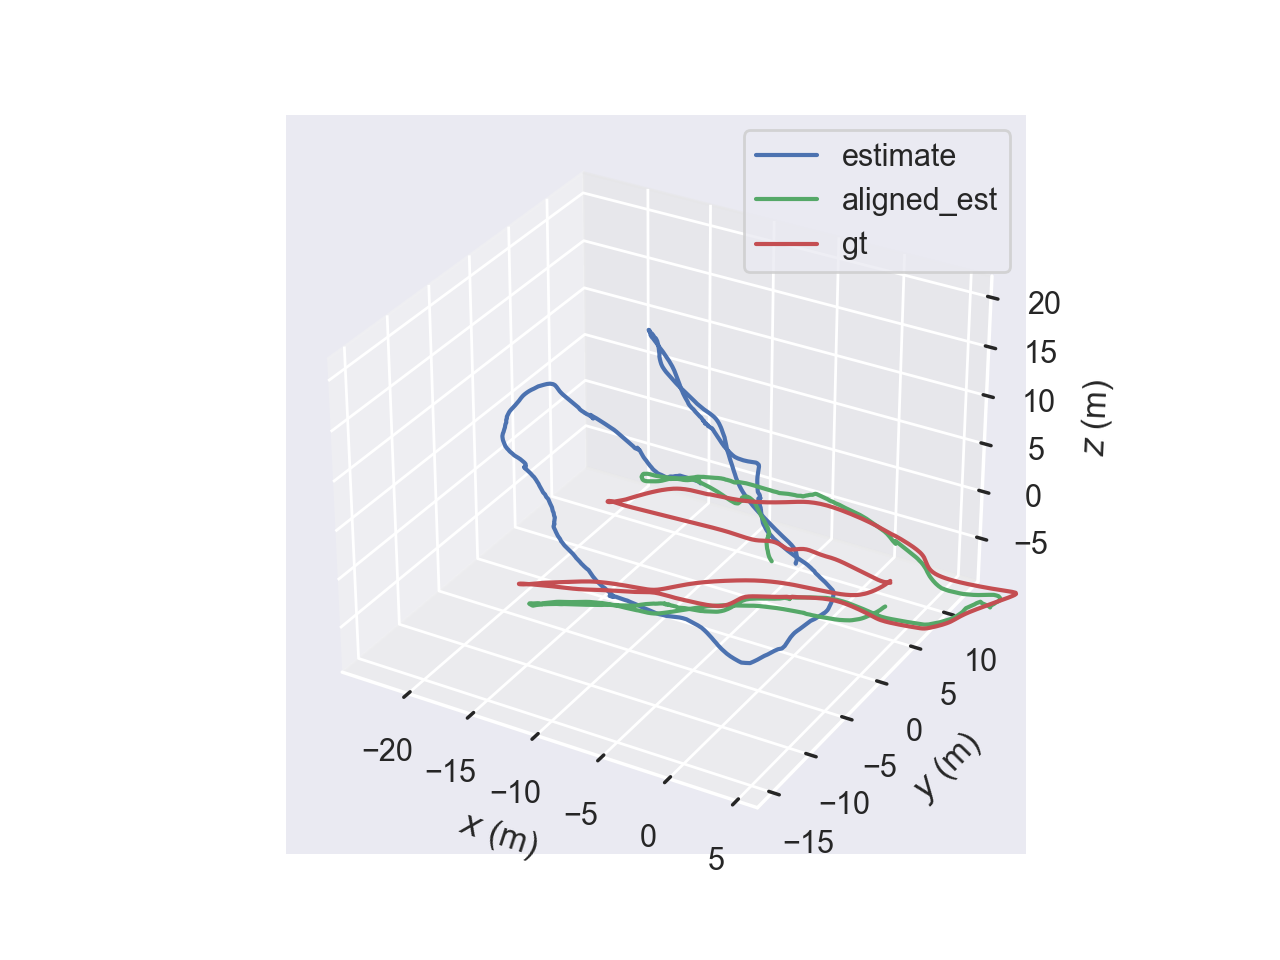

0.18473671631302674
amusement
734 poses, 123.657m path length 734 poses, 126.364m path length


<IPython.core.display.Javascript object>


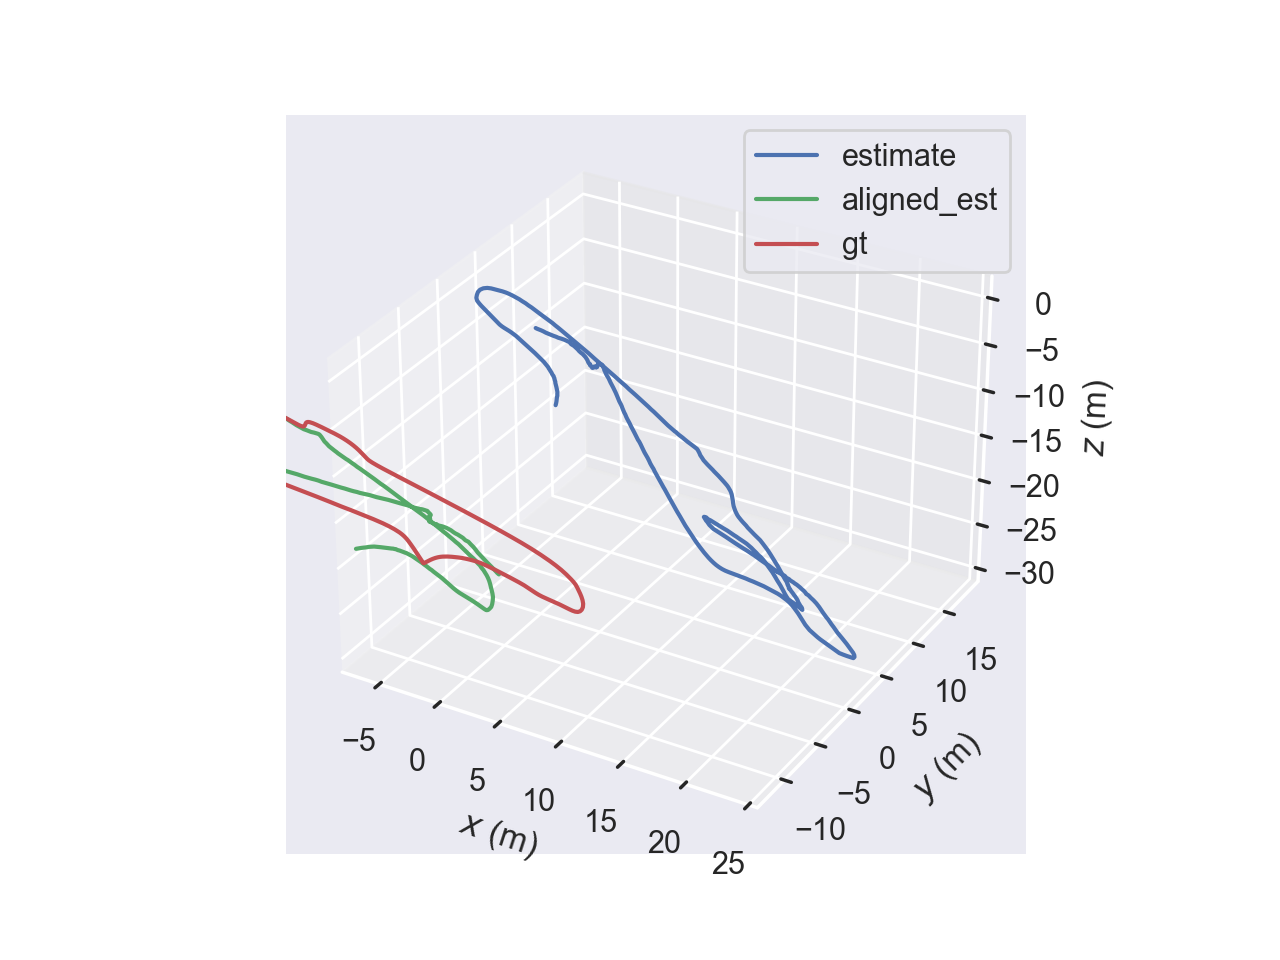

0.27541763004533537
gascola
382 poses, 47.284m path length 382 poses, 44.981m path length


<IPython.core.display.Javascript object>


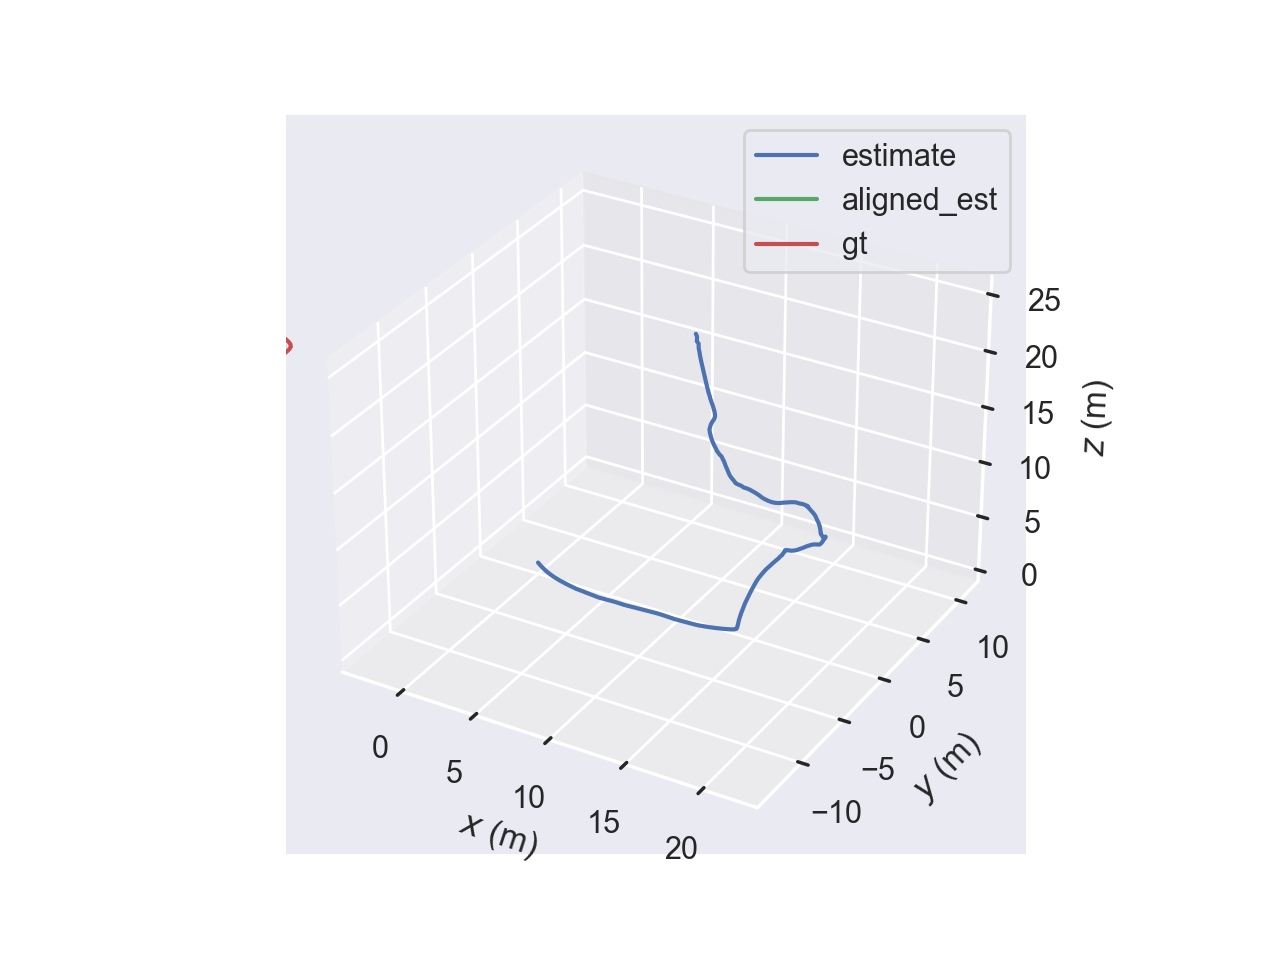

0.1384402042283033
hospital
480 poses, 36.881m path length 480 poses, 41.468m path length


<IPython.core.display.Javascript object>


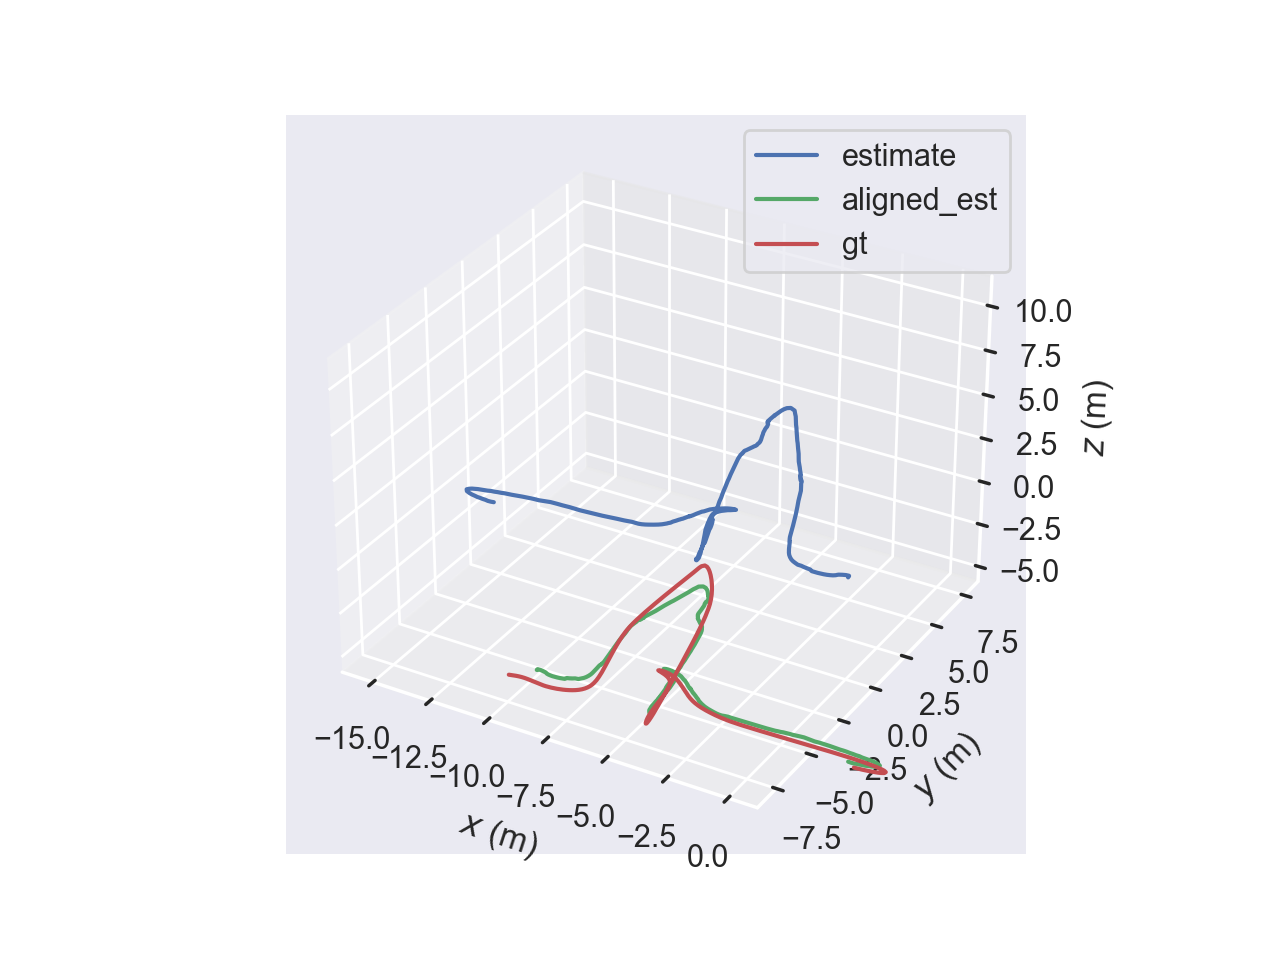

0.15437943501935666
office
1395 poses, 89.041m path length 1395 poses, 92.506m path length


<IPython.core.display.Javascript object>


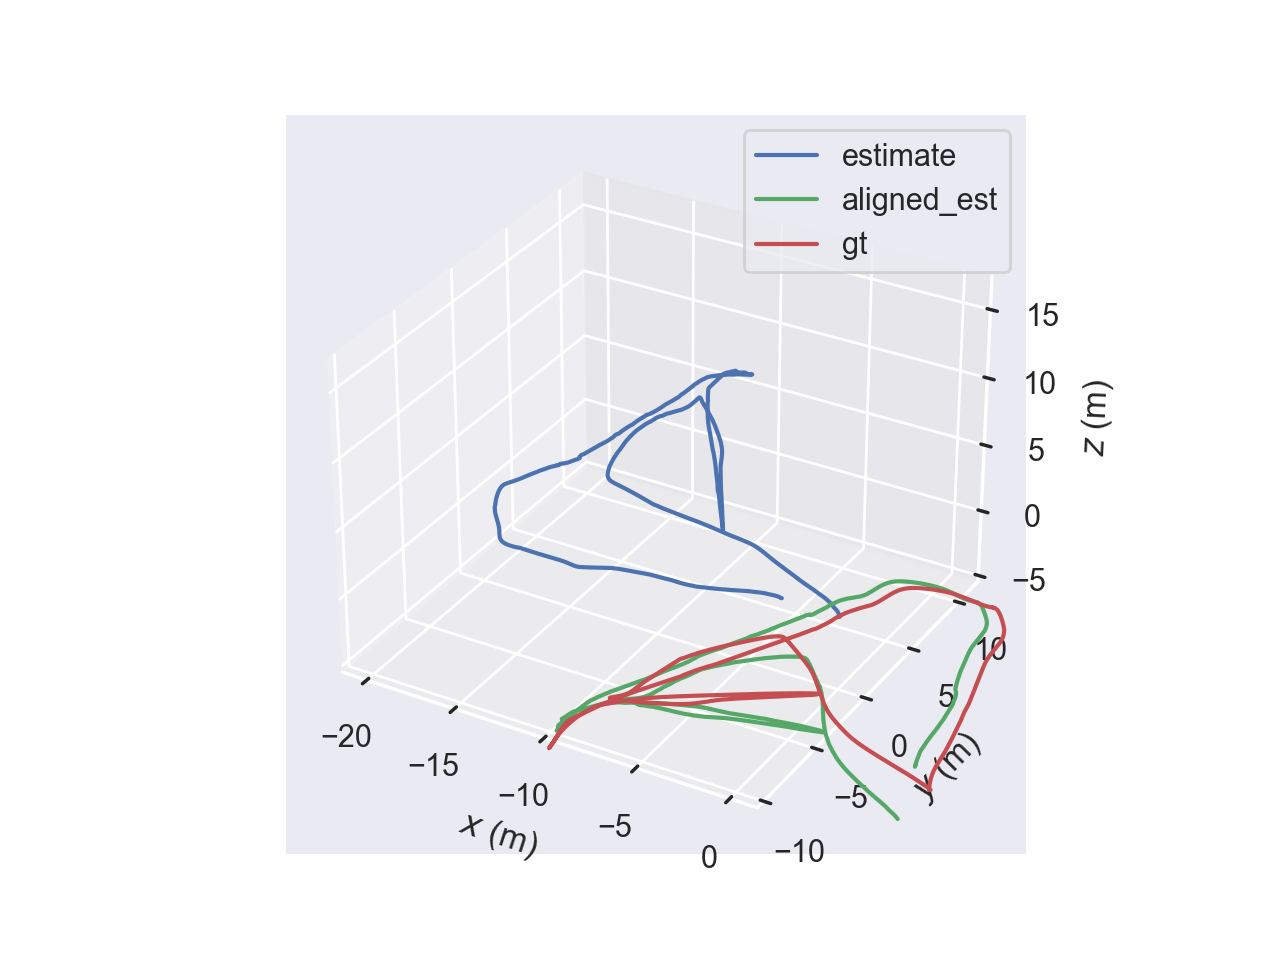

0.0889102547518988
seasonsforest
319 poses, 43.515m path length 319 poses, 43.932m path length


<IPython.core.display.Javascript object>


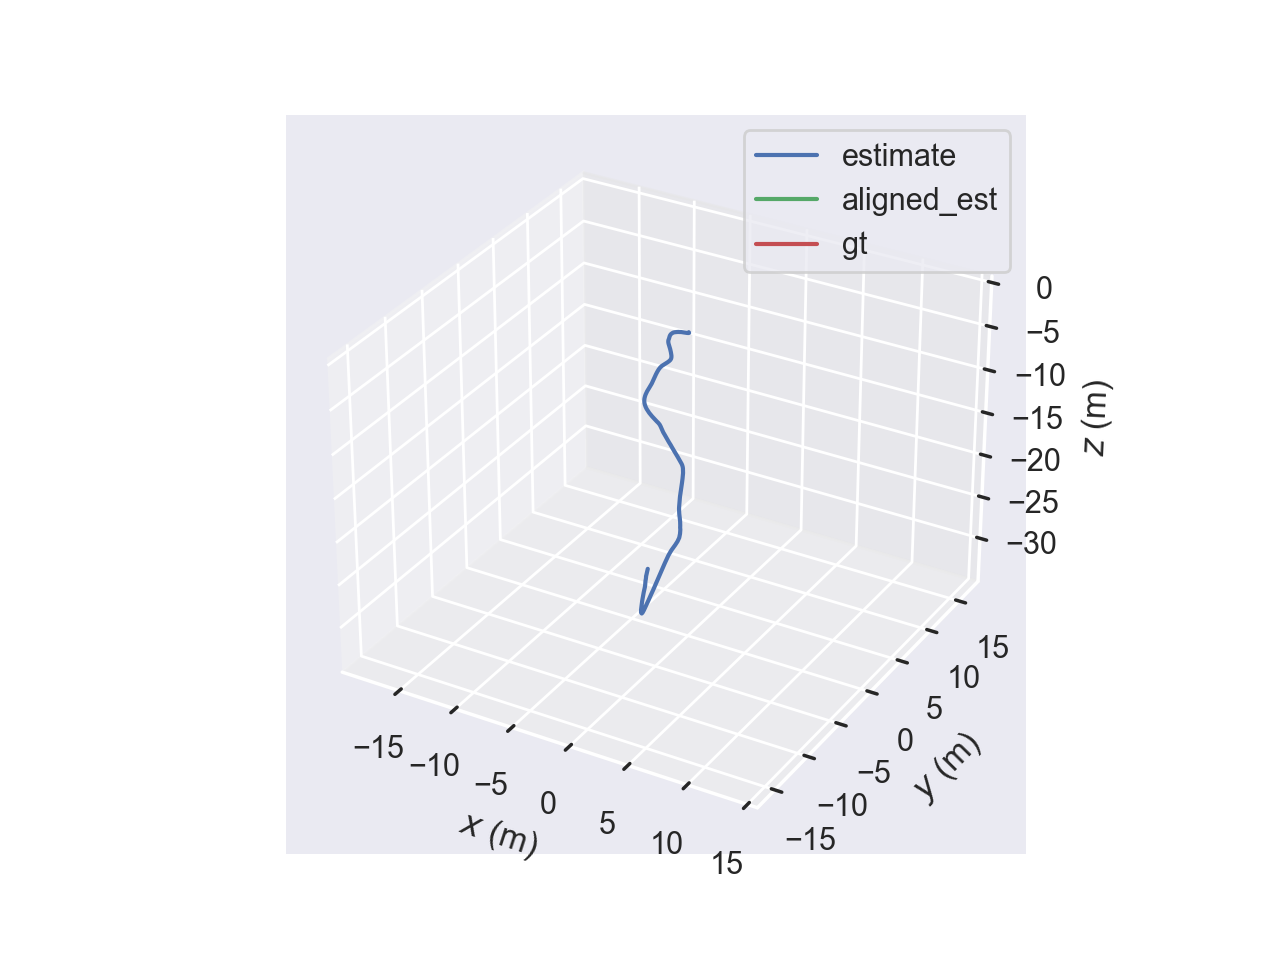

0.23354660922108145
seasonsforest_winter
847 poses, 159.132m path length 847 poses, 160.303m path length


<IPython.core.display.Javascript object>


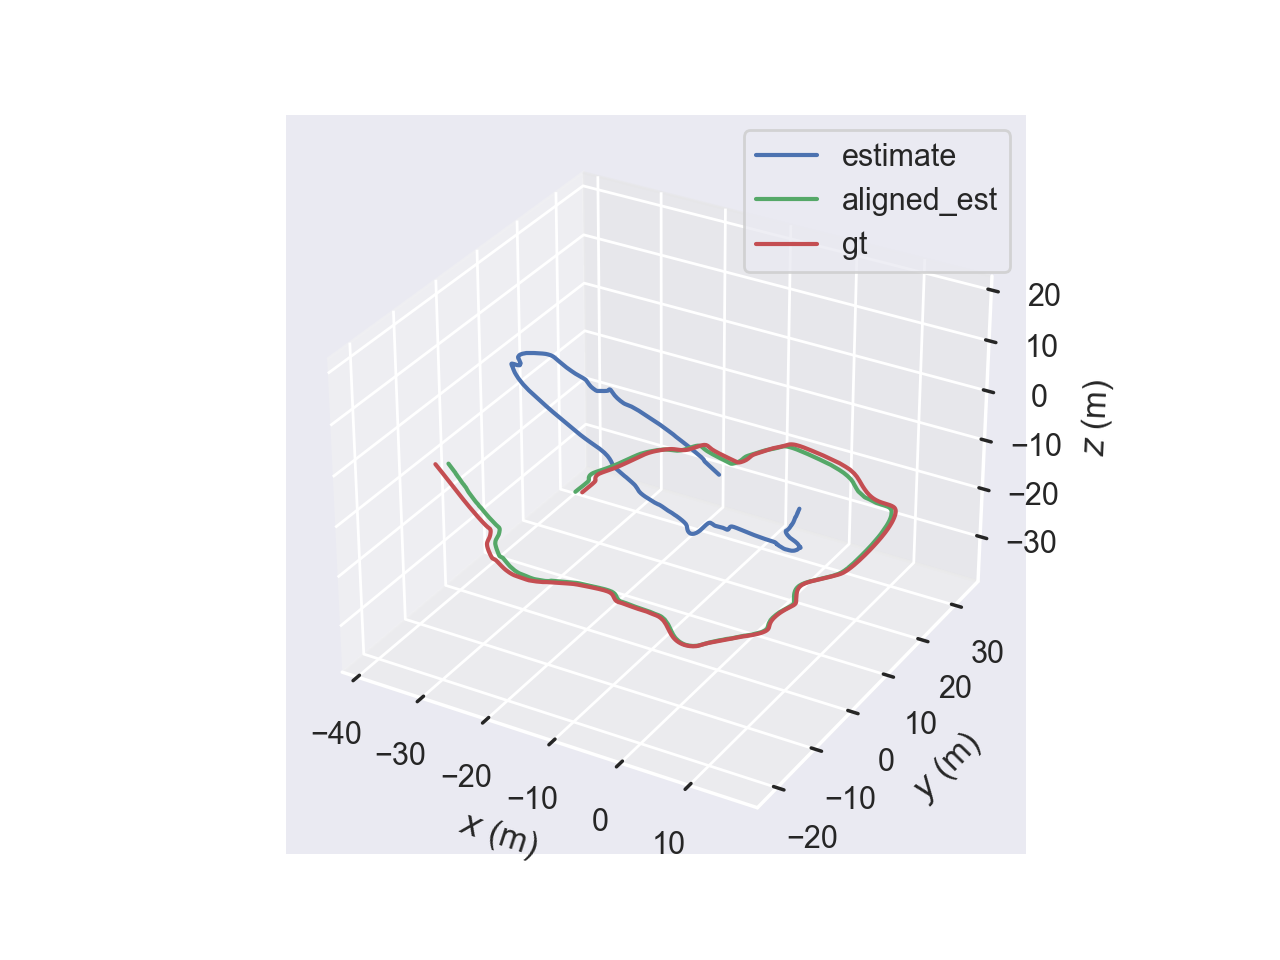

0.22457263649410486
soulcity
1083 poses, 147.843m path length 1083 poses, 148.337m path length


<IPython.core.display.Javascript object>


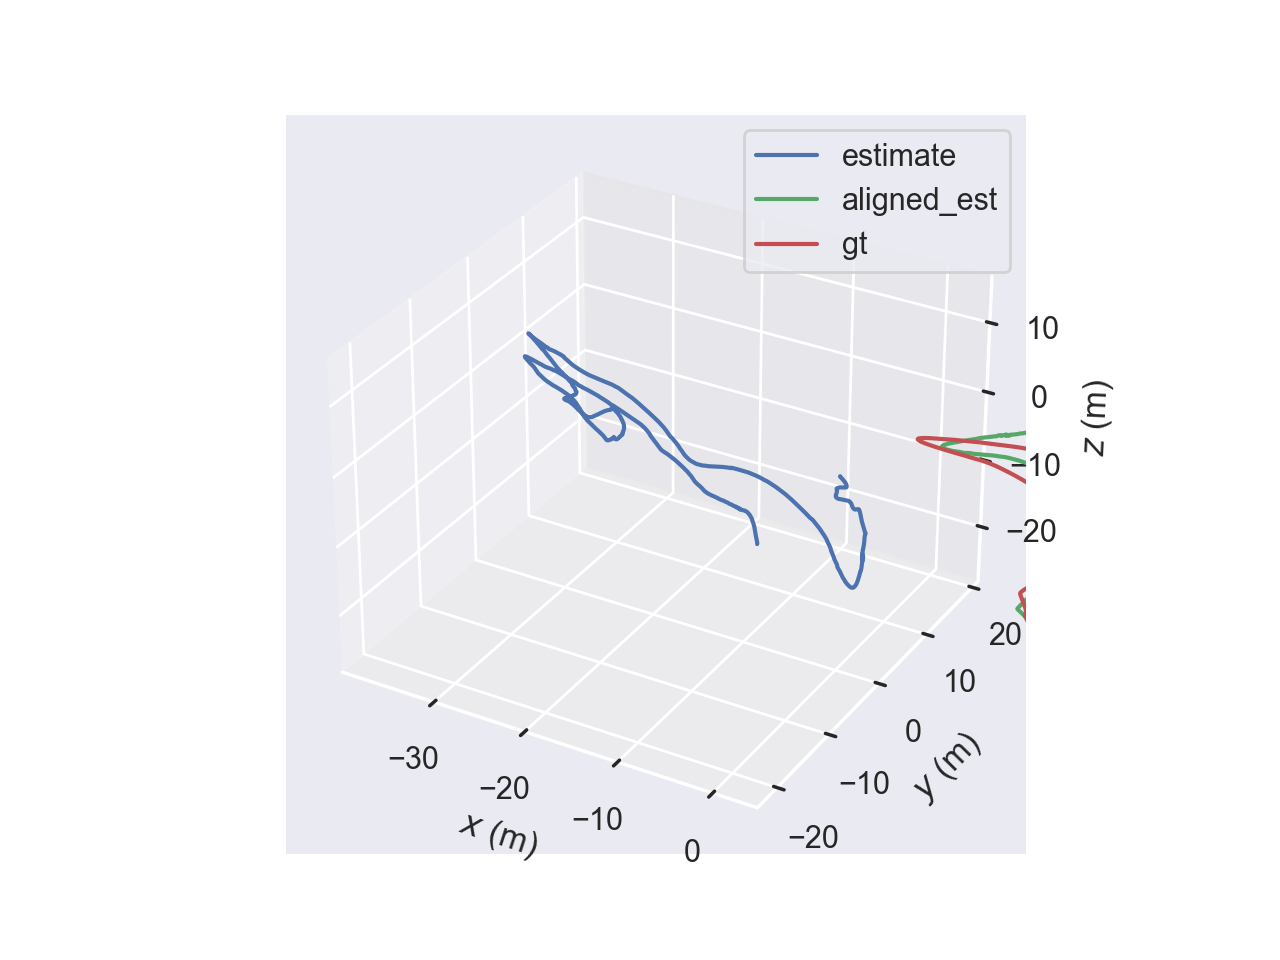

0.2317564624731346


In [11]:
seqs = ["abandonedfactory", "abandonedfactory_night", "endofworld", "carwelding", "amusement", "gascola", "hospital", "office", "seasonsforest", "seasonsforest_winter", "soulcity"]
# "oldtown" "japanesealley" "neighborhood" "ocean" "seasidetown" "westerndesert"
for seq in seqs:
    print(seq)
    traj_est = file_interface.read_kitti_poses_file("./est/cvo_tartan_outdoor_" + seq + ".txt")
    traj_ref = file_interface.read_kitti_poses_file("./ref/pose_left_" + seq + "_kitti.txt")
    print(traj_est, traj_ref)
    traj_plot(traj_est, traj_ref)
